<a href="https://colab.research.google.com/github/JazmineOrtizMarin/Simulaci-n-2/blob/main/Monster_Hunter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
def log_densidad_objetivo(x):
    x1, x2 = x[0], x[1]
    exponente = -(x1**2 * x2**2 + x1**2 + x2**2 - 8*x1 - 8*x2) / 2
    return exponente

In [85]:
numero_muestras = 50000        # Número total de muestras a generar
estado_inicial = np.array([1.0, 1.0]) # Punto de partida de la cadena
desviacion_propuesta = 0.6     # Desviación estándar de la propuesta
periodo_quemado = 5000         # Muestras iniciales a descartar

In [86]:
muestras = np.zeros((numero_muestras, 2))
estado_actual = estado_inicial
muestras[0] = estado_actual

In [87]:
log_prob_actual = log_densidad_objetivo(estado_actual)

In [88]:
for i in range(1, numero_muestras):

    propuesta = estado_actual + np.random.normal(0, desviacion_propuesta, size=2)

    log_prob_propuesta = log_densidad_objetivo(propuesta)

    log_ratio_aceptacion = log_prob_propuesta - log_prob_actual

    if np.log(np.random.rand()) < log_ratio_aceptacion:
        estado_actual = propuesta
        log_prob_actual = log_prob_propuesta

    muestras[i] = estado_actual

In [89]:
muestras_finales = muestras[periodo_quemado:]

In [90]:
valor_esperado_estimado = np.mean(muestras_finales, axis=0)
estimacion_x1 = valor_esperado_estimado[0]
estimacion_x2 = valor_esperado_estimado[1]

Estimación del valor esperado (Media):
--------------------------------------
Estimación de x1: 1.76199291
Estimación de x2: 1.92953706


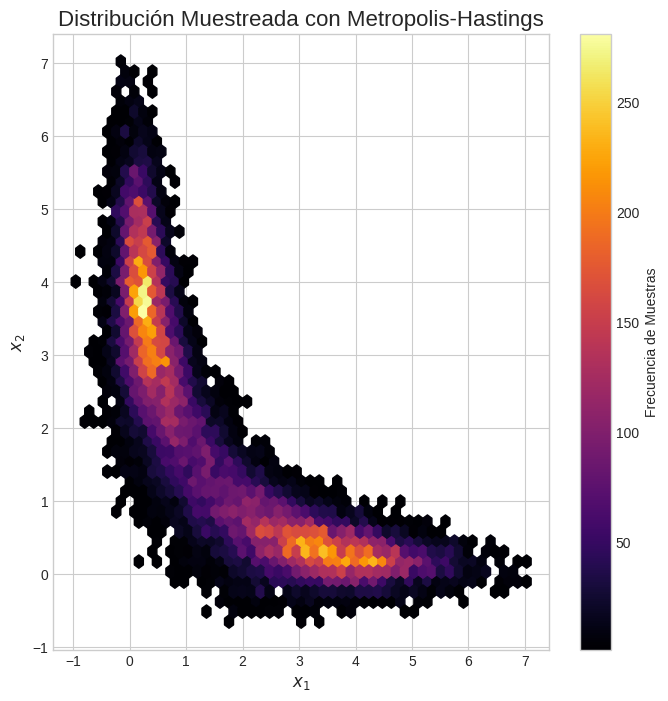

In [101]:
print ("Estimación del valor esperado (Media):")
print ("--------------------------------------")
print (f"Estimación de x1: {estimacion_x1:.8f}")
print (f"Estimación de x2: {estimacion_x2:.8f}")


plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 8))

hb = ax.hexbin(
    muestras_finales[:, 0],
    muestras_finales[:, 1],
    gridsize=50,
    cmap='inferno',
    mincnt=1
)

cb = fig.colorbar(hb, ax=ax)
cb.set_label('Frecuencia de Muestras')

# Títulos y etiquetas
ax.set_title('Distribución Muestreada con Metropolis-Hastings', fontsize=16)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)

plt.show()


***Caminata 2D***

In [93]:
pasos_totales = 50000
posicion_inicial = np.array([1.0, 1.0])
tamano_del_paso = 0.8  # Qué tan lejos intenta saltar en cada propuesta
pasos_de_calentamiento = 5000 # Pasos iniciales que no contamos

In [94]:
recorrido = np.zeros ((pasos_totales,2))
posicion_actual = posicion_inicial
recorrido[0] = posicion_actual

In [95]:
log_prob_actual = log_densidad_objetivo(posicion_actual)

In [96]:
for i in range(1, pasos_totales):
    propuesta = posicion_actual + np.random.normal(0, tamano_del_paso, size=2)

    log_prob_propuesta = log_densidad_objetivo(propuesta)

    log_ratio_aceptacion = log_prob_propuesta - log_prob_actual

    if np.log(np.random.rand()) < log_ratio_aceptacion:

        posicion_actual = propuesta
        log_prob_actual = log_prob_propuesta

    recorrido[i] = posicion_actual

Estimación Final de la Caminata:
La posición promedio estimada para (x1, x2) es: (1.7782, 1.9070)


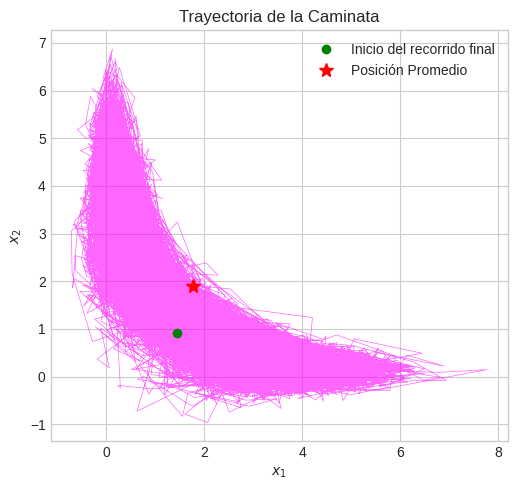

In [100]:
recorrido_final = recorrido[pasos_de_calentamiento:]

posicion_promedio = np.mean(recorrido_final, axis=0)

print("Estimación Final de la Caminata:")
print(f"La posición promedio estimada para (x1, x2) es: ({posicion_promedio[0]:.4f}, {posicion_promedio[1]:.4f})")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(recorrido_final[:, 0], recorrido_final[:, 1], lw=0.5, alpha=0.6, color='magenta')
plt.plot(recorrido_final[0,0], recorrido_final[0,1], 'go', label='Inicio del recorrido final')
plt.plot(posicion_promedio[0], posicion_promedio[1], 'r*', markersize=10, label='Posición Promedio')
plt.title("Trayectoria de la Caminata")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
